In [75]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = (15,5)


In [76]:

df = pd.read_csv('C:/Users/user/Desktop/TCS INTERNSHIP/train.csv')

In [77]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [78]:
df.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [79]:
df.shape

(913000, 4)

In [80]:
df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [81]:
#Checking no of observation in each store
df['store'].value_counts()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store, dtype: int64

In [82]:
df['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [83]:
#Checking no of observation in each item
df['item'].value_counts()

1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: item, dtype: int64

DATA PREPROCESSING

In [84]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [85]:
#Converting date object to datetime
df['date'] = pd.to_datetime(df['date'])

In [86]:
# Checking for null values
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [87]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [88]:
def categories(item,store):
    #Categorizing the dataframe
    global new_df
    new_df = df[(df['item']==item) & (df['store']==store)]
    new_df.drop(['store','item'],axis=1,inplace=True)
    new_df = new_df.set_index('date')
    new_df.sort_values('date')
    # Checking the missing values
    if np.array(new_df.isna().sum() == 0):
        print('No null values present',)
        print(new_df.isna().sum())
        print(new_df.head())
        print(new_df.tail())
        print("Shape","=",new_df.shape)
    else:
        print("Null value is present pre-processing is required")
        print(new_df.isna().sum())
        print(new_df.head())
        print(new_df.tail())
        print('Shape',"=",new_df.shape)
    
    

    

In [89]:
# Taking item and store number 1
categories(1,1)

No null values present
sales    0
dtype: int64
            sales
date             
2013-01-01     13
2013-01-02     11
2013-01-03     14
2013-01-04     13
2013-01-05     10
            sales
date             
2017-12-27     14
2017-12-28     19
2017-12-29     15
2017-12-30     27
2017-12-31     23
Shape = (1826, 1)



EDA

Shape = (60, 1)


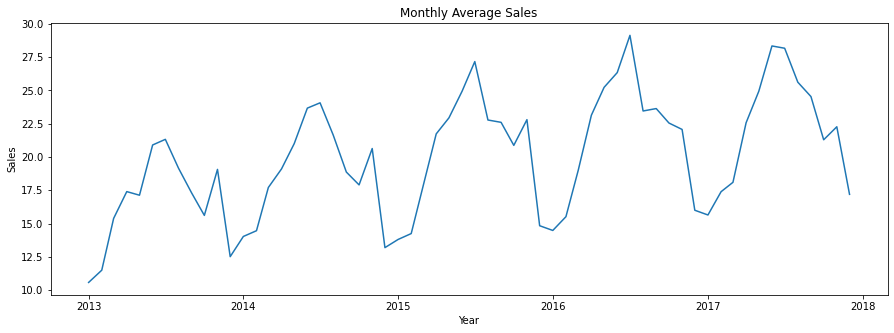

In [90]:
new_df.groupby('date')['sales'].sum()
# Assigning the target variable which is sales at the start of the month
y = new_df.resample('MS').mean()
print('Shape','=',y.shape)
# Plotting the varible y
rcParams['figure.figsize'] = (15,5)
plt.plot(y)
plt.title('Monthly Average Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()
# From visual inspection the sales looks like non-stationary  in nature. 



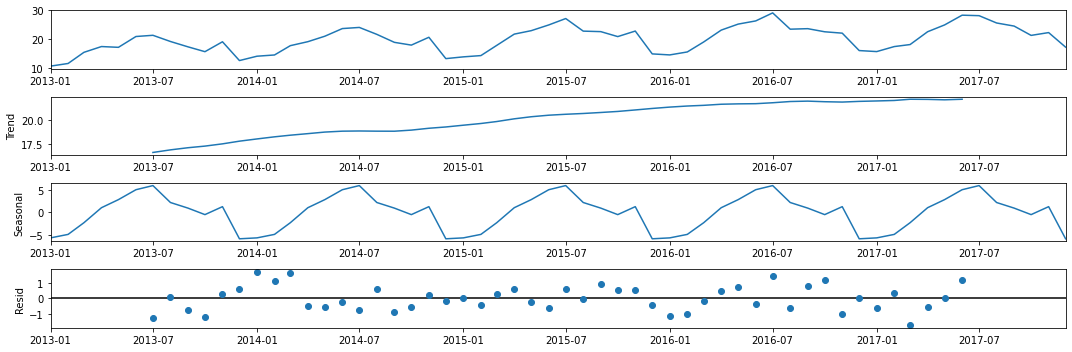

In [91]:
#Time-series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y,model='additive')
decomposition.plot()
rcParams['figure.figsize'] = (15,5)
plt.show()

Stationary test using Statistical methods

In [92]:
#Statistically testing whether the visual inspection of non -stationarity is true or not
# Dickey fuller test 
# H0 : non-stationary
# H1 : stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
  for value,labels in zip(result,labels):
    print(labels+' : '+str(value) )
  if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
  else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [93]:
adfuller_test(y['sales'])

ADF Test Statistic : -4.051321644240108
p-value : 0.0011643777601817863
Lags Used : 11
Number of Observations Used : 48
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [94]:
# KPSS TEST, assuming the series trend stationary
# H0 : Series is trend stationary or series has no unit root.
# H1 : Series is non-stationary or series has a unit root.
from statsmodels.tsa.stattools import kpss
def kpss_test(sales):
  kpss_result = kpss(sales,regression='ct') # Assuming the series is stationary around the trend as there is a trend component
  label = ['Test-statistic','P-value','Lags','Critical values']
  for i,j in zip(label,kpss_result):
    print(i + ": " +str(j))
  if kpss_result[1] < 0.05:
    print("Series is non - stationary")
  else:
    print("Series is stationary")    


In [95]:
kpss_test(y['sales'])

Test-statistic: 0.032345193819155314
P-value: 0.1
Lags: 4
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is stationary


Since the KPSS test proves it is non-stationary , Hence the series is difference stationary and therefore differencing needs to be done.

In [96]:
y['sales_first_diff'] = y['sales'] - y['sales'].shift()
y['sales_seasonal_diff'] = y['sales'] - y['sales'].shift(12)
y.head()

,sales,sales_first_diff,sales_seasonal_diff
date,,,
2013-01-01,10.580645,NaN,NaN
2013-02-01,11.500000,0.919355,NaN
2013-03-01,15.387097,3.887097,NaN
2013-04-01,17.400000,2.012903,NaN
2013-05-01,17.129032,-0.270968,NaN


In [97]:
adfuller_test(y['sales_first_diff'].dropna())
kpss_test(y['sales_first_diff'].dropna())


ADF Test Statistic : -4.010691898735375
p-value : 0.0013555485867673867
Lags Used : 11
Number of Observations Used : 47
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Test-statistic: 0.0335161554197472
P-value: 0.1
Lags: 2
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is stationary


Since the series has got seasonal nature and the first diff is still non-stationary. Seasonal difference is taken and tested

In [98]:
adfuller_test(y['sales_seasonal_diff'].dropna())
kpss_test(y['sales_seasonal_diff'].dropna())

ADF Test Statistic : -4.694690597678167
p-value : 8.610678219472325e-05
Lags Used : 0
Number of Observations Used : 47
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Test-statistic: 0.0690941339471065
P-value: 0.1
Lags: 2
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is stationary


Since both tests are stationary, the series is strict stationary. 

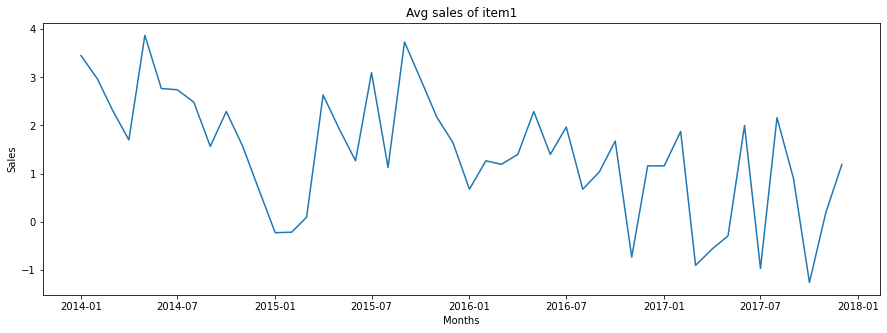

In [99]:
plt.plot(y['sales_seasonal_diff'].dropna())
rcParams['figure.figsize'] = (15,5)
plt.title('Avg sales of item1')
plt.ylabel('Sales')
plt.xlabel('Months')
plt.show()


MODELING


Hyperparameters p,d,q


a) ACF and PACF plot method

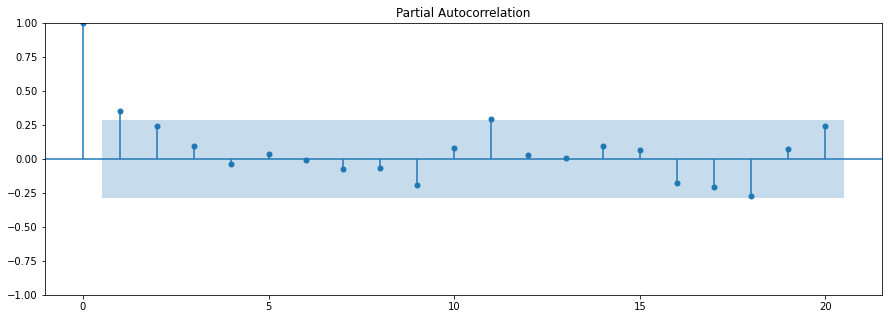

In [100]:

from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(y['sales_seasonal_diff'].iloc[13:],lags=20)
rcParams['figure.figsize'] = (15,5)
plt.show()
# This shows correlation value upto 1 is high enough


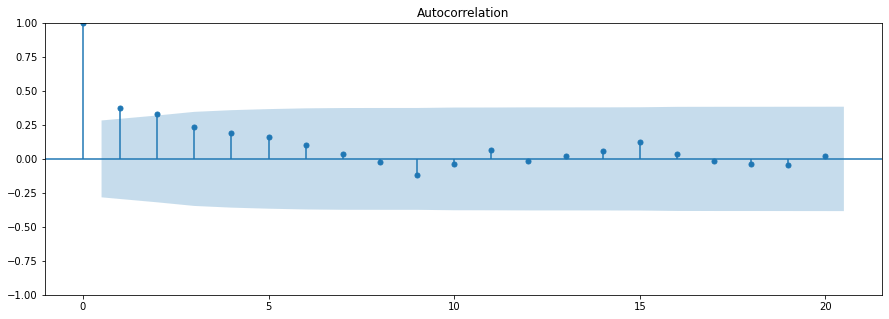

In [101]:
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(y['sales_seasonal_diff'].dropna(),lags=20)
rcParams['figure.figsize'] = (15,5)
# q = 1,2

ARIMA


Fitting model 
a) Way1 - Splitting into train test and then fitting into the model 
b) Way-2 - Direct fitting the sales value into the model

p=1,d=1,q=1

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   37
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -89.901
Date:                Fri, 27 May 2022   AIC                            185.802
Time:                        16:24:35   BIC                            190.552
Sample:                    01-01-2013   HQIC                           187.460
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.125     -7.989      0.000      -1.245      -0.755
ma.L1          0.9975      5.764      0.173      0.863     -10.301      12.296
sigma2         8.2752     45.396      0.182      0.8

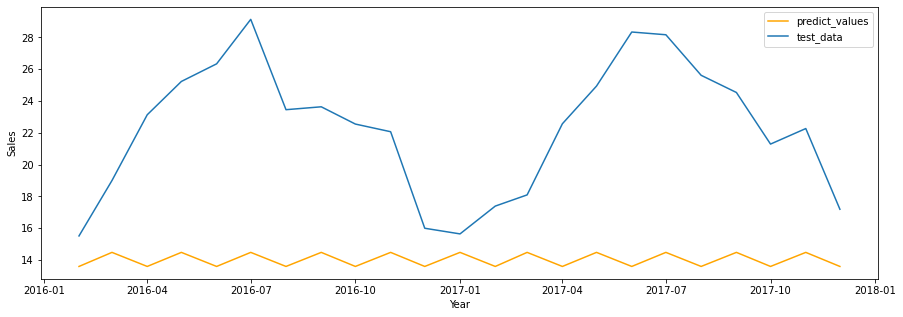

In [102]:

train_data = y['sales'][:37]
test_data = y['sales'][37:]
model = sm.tsa.ARIMA(train_data,order=(1,1,1)).fit()
print(model.summary())
pred = model.predict(start=len(train_data),end=len(y['sales'])-1,dynamic=False)
#Plotting the graph
rcParams['figure.figsize'] = (15,5)
plt.plot(pred,color='orange')
plt.plot(test_data)
plt.legend(('predict_values','test_data'))
plt.ylabel('Sales')
plt.xlabel('Year')
#Checking mean and var of test and rsme of pred
from math import sqrt
from sklearn.metrics import mean_squared_error
rsme = sqrt(mean_squared_error(test_data,pred))
print('rsme',rsme)
print('Mean of test','=',test_data.mean())
print('Var','=',test_data.var())

The RSME value = 3.19


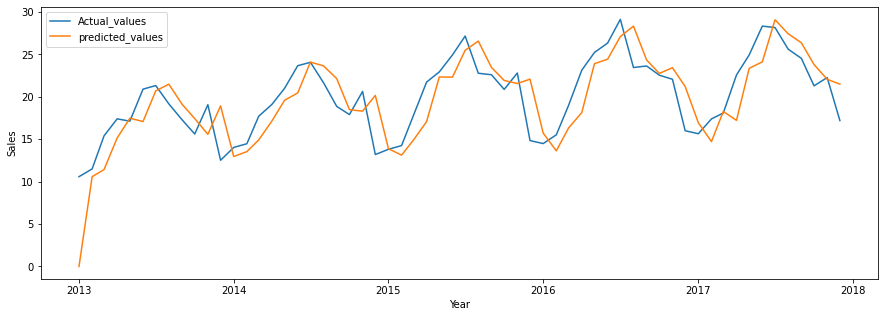

In [103]:
#Way2
model = sm.tsa.ARIMA(y['sales'],order=(1,1,1))
model_fit = model.fit()
# Concating actual and pred values
data1 = y[['sales']]
data2 = pd.DataFrame(model_fit.fittedvalues)
data3 = pd.concat([data1,data2],axis=1,join='inner')
data3.rename(columns={0:'pred_sales'},inplace=True)
#plotting the 
rcParams['figure.figsize'] = (15,5)
plt.plot(data3['sales'])
plt.plot(data3['pred_sales'])
plt.ylabel('Sales')
plt.xlabel('Year')
plt.legend(('Actual_values','predicted_values'))
#Checking the error
from math import sqrt
from sklearn.metrics import mean_squared_error
rsme = sqrt(mean_squared_error(data3['sales'],data3['pred_sales'])).__round__(2)
print("The RSME value","=",rsme.__round__(2))



p=1,d=1,q=2

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   37
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -89.857
Date:                Fri, 27 May 2022   AIC                            187.713
Time:                        16:24:36   BIC                            194.047
Sample:                    01-01-2013   HQIC                           189.924
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.104     -9.658      0.000      -1.203      -0.797
ma.L1          1.0447      4.607      0.227      0.821      -7.984      10.074
ma.L2          0.0476      0.409      0.116      0.9

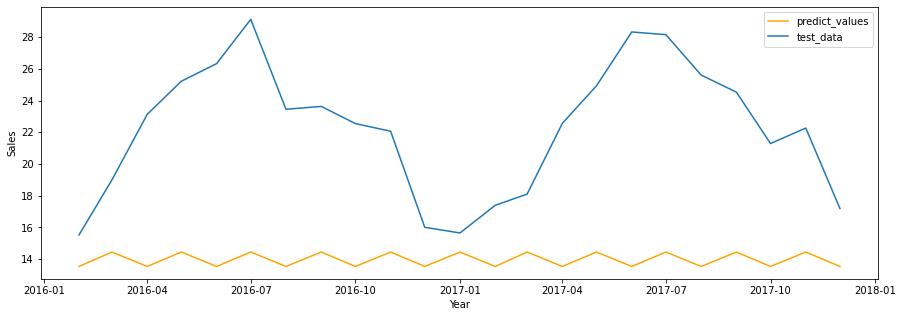

In [104]:
train_data = y['sales'][:37]
test_data = y['sales'][37:]
model = sm.tsa.ARIMA(train_data,order=(1,1,2)).fit()
print(model.summary())
pred = model.predict(start=len(train_data),end=len(y['sales'])-1,dynamic=False)
#Ploting the graph
rcParams['figure.figsize'] = (15,5)
plt.plot(pred,color='orange')
plt.plot(test_data)
plt.legend(('predict_values','test_data'))
plt.ylabel('Sales')
plt.xlabel('Year')
#Checking mean and var of test and rsme of pred
from math import sqrt
from sklearn.metrics import mean_squared_error
rsme = sqrt(mean_squared_error(test_data,pred)).__round__(2)
print('rsme',rsme)
print('Mean of test','=',test_data.mean())
print('Var','=',test_data.var())

The RSME value = 3.21


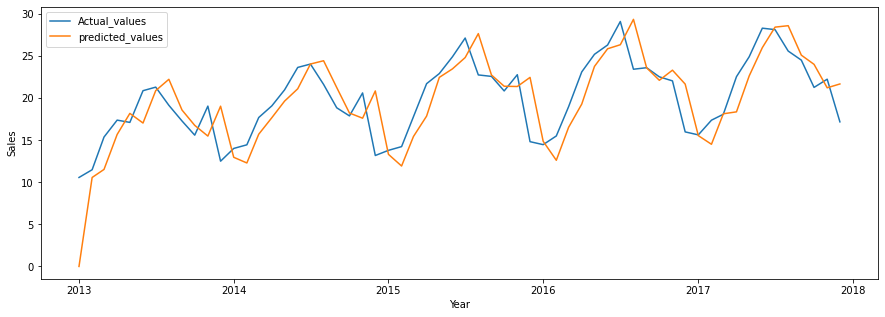

In [105]:
# Way-2
model = sm.tsa.ARIMA(y['sales'],order=(1,1,2))
model_fit = model.fit()
# Concating actual and pred values
data1 = y[['sales']]
data2 = pd.DataFrame(model_fit.fittedvalues)
data3 = pd.concat([data1,data2],axis=1,join='inner')
data3.rename(columns={0:'pred_sales'},inplace=True)
#plotting the graph
rcParams['figure.figsize'] = (15,5)
plt.plot(data3['sales'])
plt.plot(data3['pred_sales'])
plt.ylabel('Sales')
plt.xlabel('Year')
plt.legend(('Actual_values','predicted_values'))
#Checking the error
from math import sqrt
from sklearn.metrics import mean_squared_error
rsme = sqrt(mean_squared_error(data3['sales'],data3['pred_sales']))
print("The RSME value","=",rsme.__round__(2))

b) For Loop method

In [106]:
import itertools as it
# Assuming some range for p,d,q
p = range(0,11)
d=range(0,2)
q=range(0,3)
pdq_combination = list(it.product(p,d,q))
# Aggregating the pdq value based on lowest rsme value for best hyperparameters
print(len(pdq_combination))
RSME = []
pdq_values = []
for pdq in pdq_combination:
    try:
        model = sm.tsa.ARIMA(train_data,order=pdq).fit()
        pred = model.predict(start=len(train_data),end=len(y['sales'])-1)
        error = sqrt(mean_squared_error(test_data,pred))
        RSME.append(error)
        pdq_values.append(pdq)
    except:
        continue
    
        
dict_values = dict(zip(pdq_values,RSME))
required_key = min(dict_values,key=dict_values.get)
print("The pdq value corresponding to lowest RSME value"," = ",required_key)



66
The pdq value corresponding to lowest RSME value  =  (9, 1, 2)


p=9,d=1,q=2

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   37
Model:                 ARIMA(9, 1, 2)   Log Likelihood                 -71.752
Date:                Fri, 27 May 2022   AIC                            167.504
Time:                        16:24:50   BIC                            186.507
Sample:                    01-01-2013   HQIC                           174.137
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3049      0.263      1.158      0.247      -0.211       0.821
ar.L2         -0.3748      0.270     -1.390      0.164      -0.903       0.154
ar.L3         -0.5793      0.292     -1.982      0.0

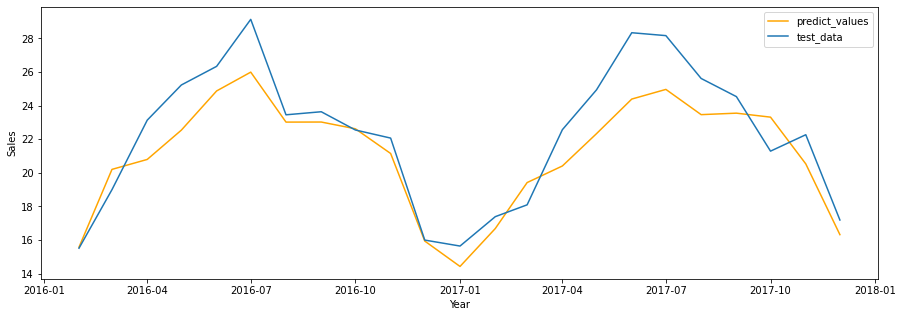

In [107]:
#way-1
train_data = y['sales'][:37]
test_data = y['sales'][37:]
model = sm.tsa.ARIMA(train_data,order=(9,1,2)).fit()
print(model.summary())
pred = model.predict(start=len(train_data),end=len(y['sales'])-1,dynamic=False)
#Ploting the graph
rcParams['figure.figsize'] = (15,5)
plt.plot(pred,color='orange')
plt.plot(test_data)
plt.legend(('predict_values','test_data'))
plt.ylabel('Sales')
plt.xlabel('Year')
#Checking mean and var of test and rsme of pred
from math import sqrt
from sklearn.metrics import mean_squared_error
rsme = sqrt(mean_squared_error(test_data,pred)).__round__(2)
print('rsme',rsme)
print('Mean of test','=',test_data.mean())
print('Var','=',test_data.var())

SARIMAX

Since, the sales have got seasonal nature we, opt seasonal arima model


For loop method to find hyperparameters

In [108]:
import statsmodels.api as sm
metric_aic =dict()
p=d=q=range(0,2)
pdq = list(it.product(p,d,q))
seasonal_pdq = [(x[0] , x[1] , x[2] ,12) for x in pdq]
for i in pdq:
    for j in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,order=i,seasonal_order=j,
                                        enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print("ARIMA-{}x{}12,AIC:-{}".format(i,j,results.aic))
            metric_aic.update({(i,j):results.aic})
        except:
            continue   
print("The sorted aic metric values are")        
{k:v for k,v in sorted(metric_aic.items(),key=lambda x:x[1])}


ARIMA-(0, 0, 0)x(0, 0, 0, 12)12,AIC:-316.6692161433817
ARIMA-(0, 0, 0)x(0, 0, 1, 12)12,AIC:-1110.4066448174024
ARIMA-(0, 0, 0)x(0, 1, 0, 12)12,AIC:-108.30625161529308
ARIMA-(0, 0, 0)x(0, 1, 1, 12)12,AIC:-47.545773916529306
ARIMA-(0, 0, 0)x(1, 0, 0, 12)12,AIC:-81.53597592927228
ARIMA-(0, 0, 0)x(1, 0, 1, 12)12,AIC:-75.72958077579275
ARIMA-(0, 0, 0)x(1, 1, 0, 12)12,AIC:-51.762147306484536
ARIMA-(0, 0, 0)x(1, 1, 1, 12)12,AIC:-48.09630062929985
ARIMA-(0, 0, 1)x(0, 0, 0, 12)12,AIC:-273.42338067680134
ARIMA-(0, 0, 1)x(0, 0, 1, 12)12,AIC:-1024.6672706509376
ARIMA-(0, 0, 1)x(0, 1, 0, 12)12,AIC:-91.16792402196943
ARIMA-(0, 0, 1)x(0, 1, 1, 12)12,AIC:-44.756723724023566
ARIMA-(0, 0, 1)x(1, 0, 0, 12)12,AIC:-81.30912513662489
ARIMA-(0, 0, 1)x(1, 0, 1, 12)12,AIC:-74.59287105955163
ARIMA-(0, 0, 1)x(1, 1, 0, 12)12,AIC:-52.01876319397036
ARIMA-(0, 0, 1)x(1, 1, 1, 12)12,AIC:-44.2850500349225
ARIMA-(0, 1, 0)x(0, 0, 0, 12)12,AIC:-179.97600999880478
ARIMA-(0, 1, 0)x(0, 0, 1, 12)12,AIC:-111.64477406519407
AR

{((0, 1, 1), (0, 1, 1, 12)): 33.40124595252084,
 ((1, 1, 1), (0, 1, 1, 12)): 34.4771577865705,
 ((0, 1, 1), (1, 1, 1, 12)): 35.87818941566002,
 ((1, 1, 1), (1, 1, 1, 12)): 36.48133317231408,
 ((1, 0, 1), (0, 1, 1, 12)): 40.697867322888804,
 ((1, 1, 1), (1, 1, 0, 12)): 40.919867132741224,
 ((1, 0, 1), (1, 1, 1, 12)): 42.59844013448093,
 ((1, 1, 0), (1, 1, 0, 12)): 43.031470697468784,
 ((1, 1, 0), (0, 1, 1, 12)): 43.03147073831619,
 ((0, 1, 0), (0, 1, 1, 12)): 43.31152965704274,
 ((0, 0, 1), (1, 1, 1, 12)): 44.2850500349225,
 ((0, 0, 1), (0, 1, 1, 12)): 44.756723724023566,
 ((0, 1, 1), (1, 1, 0, 12)): 44.88710342865539,
 ((1, 1, 0), (1, 1, 1, 12)): 45.00265239723572,
 ((0, 1, 0), (1, 1, 1, 12)): 45.311540907465925,
 ((0, 1, 0), (1, 1, 0, 12)): 45.85062257587193,
 ((1, 0, 0), (1, 1, 0, 12)): 46.427181620479445,
 ((1, 0, 0), (0, 1, 1, 12)): 46.92798878120957,
 ((1, 0, 1), (1, 1, 0, 12)): 47.029480304362,
 ((0, 0, 0), (0, 1, 1, 12)): 47.545773916529306,
 ((0, 0, 0), (1, 1, 1, 12)): 48.09630

0,1,1 and 0,1,1,12

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4279      0.267     -1.604      0.109      -0.951       0.095
ma.S.L12      -0.0437      0.406     -0.108      0.914      -0.839       0.752
sigma2         1.1987      0.532      2.252      0.024       0.156       2.242
rsme 1.13
Mean of test = 22.263786424759974
Var = 17.21819550075759


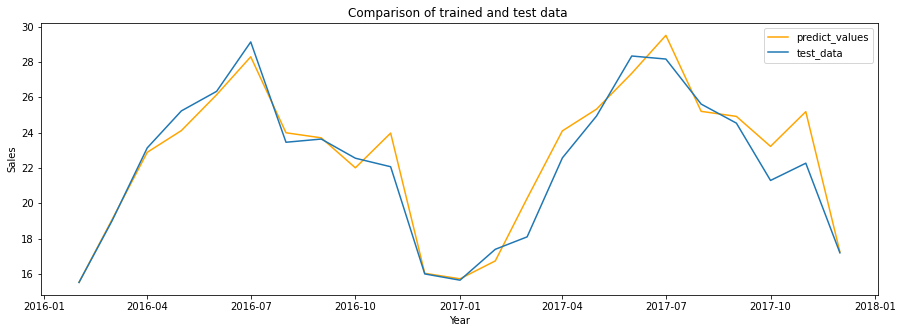

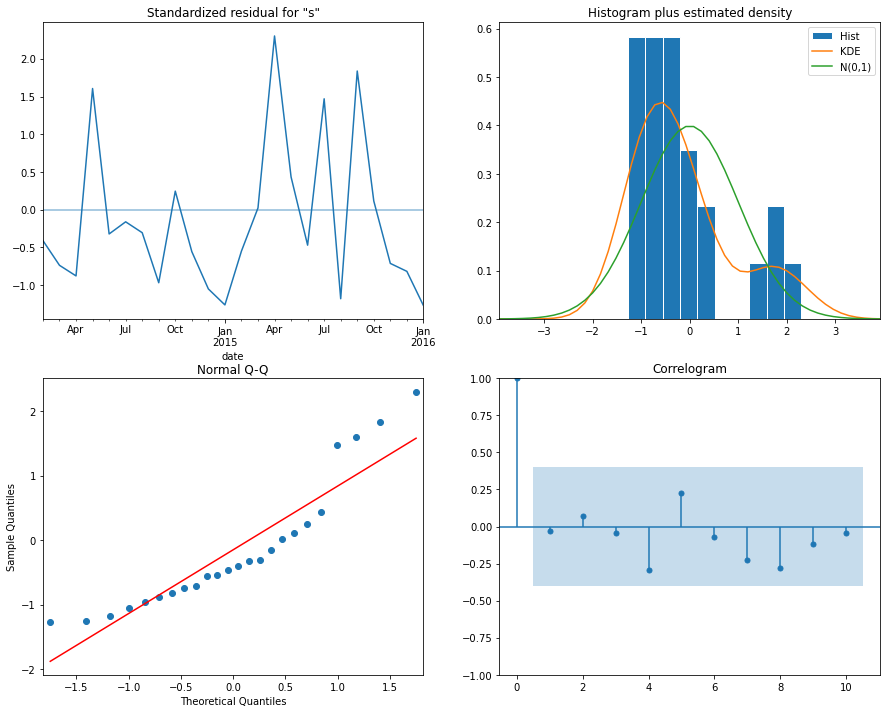

The next sales of item 1 at store 1 are  :- 2017-12-01    17.0
2018-01-01    17.0
2018-02-01    18.0
2018-03-01    21.0
2018-04-01    25.0
Freq: MS, Name: predicted_mean, dtype: float64


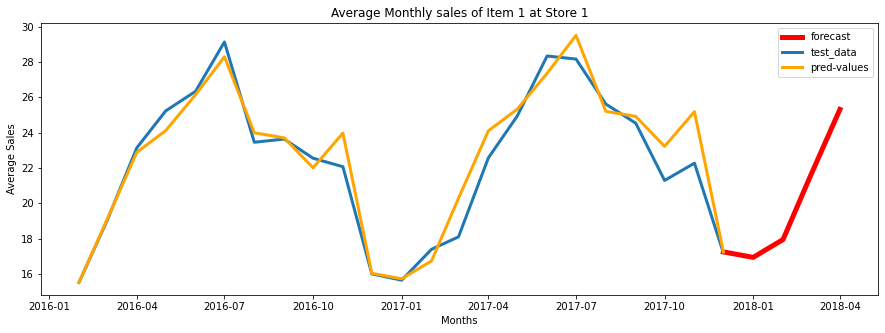

In [109]:
# Fitting the model
#way-1
train_data = y['sales'][:37]
test_data = y['sales'][37:]
model = sm.tsa.statespace.SARIMAX(train_data,order=(0,1,1),
                                     seasonal_order=(0,1,1,12),enforce_invertibility=False).fit()                                   
print(model.summary().tables[1])
pred = model.predict(start=len(train_data),end=len(y['sales'])-1,dynamic=False)
#Ploting the graph
plt.plot(pred,color='orange')
plt.plot(test_data)
plt.legend(('predict_values','test_data'))
plt.ylabel('Sales')
plt.xlabel('Year')
plt.title('Comparison of trained and test data ')
#Checking mean and var of test and rsme of pred
from math import sqrt
from sklearn.metrics import mean_squared_error
rsme = sqrt(mean_squared_error(test_data,pred)).__round__(2)
print('rsme',rsme)
print('Mean of test','=',test_data.mean())
print('Var','=',test_data.var())
#Checking the residual 
model.plot_diagnostics(figsize=(15,12))
plt.show()
#Forecast Values 
#predictions for next 3-months
forecast = model.predict(start=len(y['sales'])-1, end = len(y['sales'])+ 3)
rcParams['figure.figsize'] = (15,5)
plt.plot(forecast,color='red',lw=5)
plt.plot(test_data,lw=3)
plt.plot(pred,color='orange',lw=3)
plt.legend(('forecast','test_data','pred-values'))
plt.xlabel('Months')
plt.ylabel('Average Sales')
plt.title('Average Monthly sales of Item 1 at Store 1')
print("The next sales of item 1 at store 1 are" ," :-",forecast.round())
plt.show()




Comparison with other categories

In [110]:

categories(2,1)
new_df.groupby('date')['sales'].sum()
# Assigning the target variable which is sales at the start of the month
y_item2 = new_df.resample('MS').mean()
y_item2_stationary = y_item2['sales'].diff(12)
categories(3,1)
new_df.groupby('date')['sales'].sum()
# Assigning the target variable which is sales at the start of the month
y_item3 = new_df.resample('MS').mean()
y_item3_stationary = y_item3['sales'].diff(12)
categories(4,1)
y_item4 = new_df.resample('MS').mean()
y_item4_stationary = y_item4['sales'].diff(12)
# Merging item sales into one dataframe
store1 = pd.concat([y,y_item2,y_item3,y_item4],join='inner',axis=1)
store1.drop(['sales_first_diff','sales_seasonal_diff'],axis=1,inplace=True)
#Renaming the column names
store1.columns=['Item1','Item2','Item3','Item4']
#Making the item sales stationary
store1 = store1.diff(12)
store1


No null values present
sales    0
dtype: int64
            sales
date             
2013-01-01     33
2013-01-02     43
2013-01-03     23
2013-01-04     18
2013-01-05     34
            sales
date             
2017-12-27     55
2017-12-28     50
2017-12-29     50
2017-12-30     56
2017-12-31     67
Shape = (1826, 1)
No null values present
sales    0
dtype: int64
            sales
date             
2013-01-01     15
2013-01-02     30
2013-01-03     14
2013-01-04     10
2013-01-05     23
            sales
date             
2017-12-27     26
2017-12-28     21
2017-12-29     38
2017-12-30     27
2017-12-31     29
Shape = (1826, 1)
No null values present
sales    0
dtype: int64
            sales
date             
2013-01-01     10
2013-01-02     11
2013-01-03      8
2013-01-04     19
2013-01-05     12
            sales
date             
2017-12-27     16
2017-12-28     20
2017-12-29     25
2017-12-30     19
2017-12-31     15
Shape = (1826, 1)


,Item1,Item2,Item3,Item4
date,,,,
2013-01-01,NaN,NaN,NaN,NaN
2013-02-01,NaN,NaN,NaN,NaN
2013-03-01,NaN,NaN,NaN,NaN
2013-04-01,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN
2013-06-01,NaN,NaN,NaN,NaN
2013-07-01,NaN,NaN,NaN,NaN
2013-08-01,NaN,NaN,NaN,NaN
2013-09-01,NaN,NaN,NaN,NaN


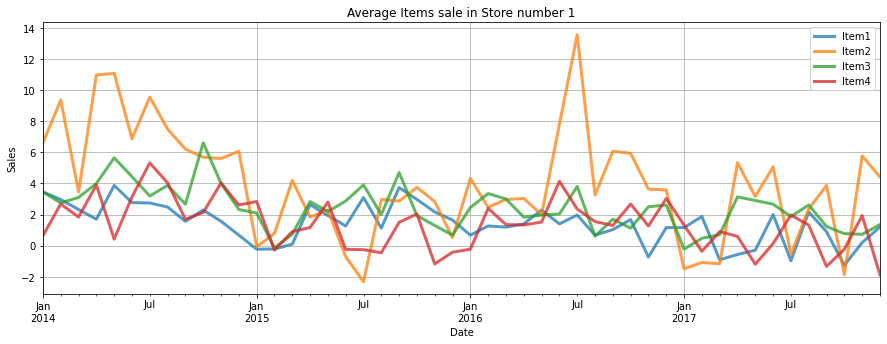

In [111]:
store1.dropna().plot(lw=3,alpha=.75,title='Average Items sale in Store number 1',xlabel='Date',ylabel='Sales')
rcParams['figure.figsize'] = (15,5)
plt.grid()
plt.show()

FbProphet 

In [112]:
y.head()

,sales,sales_first_diff,sales_seasonal_diff
date,,,
2013-01-01,10.580645,NaN,NaN
2013-02-01,11.500000,0.919355,NaN
2013-03-01,15.387097,3.887097,NaN
2013-04-01,17.400000,2.012903,NaN
2013-05-01,17.129032,-0.270968,NaN


In [113]:
y.head()
y.reset_index(inplace=True)
y1=y.drop(['sales_first_diff','sales_seasonal_diff'],axis=1)
y1.rename(columns={'date':'ds',"sales":'y'},inplace=True)
y1.head()

,ds,y
0,2013-01-01,10.580645
1,2013-02-01,11.500000
2,2013-03-01,15.387097
3,2013-04-01,17.400000
4,2013-05-01,17.129032


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2015-06-10 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.


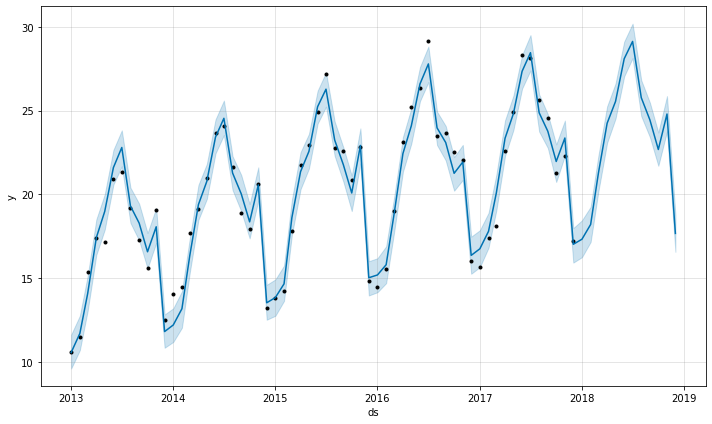

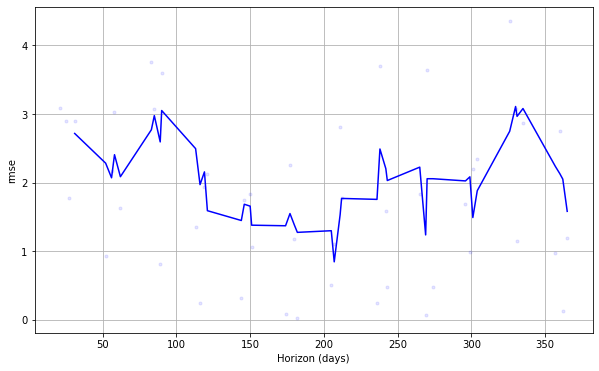

In [114]:
 from prophet import Prophet
 model_fb = Prophet()
 model_fb.fit(y1)
### Create future dates of 365 days
future_dates=model_fb.make_future_dataframe(periods=12,freq='MS')
prediction=model_fb.predict(future_dates)
prediction.head()
### plot the predicted projection
model_fb.plot(prediction)
#Checking the accuracy by evaluatin the metric
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model_fb, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

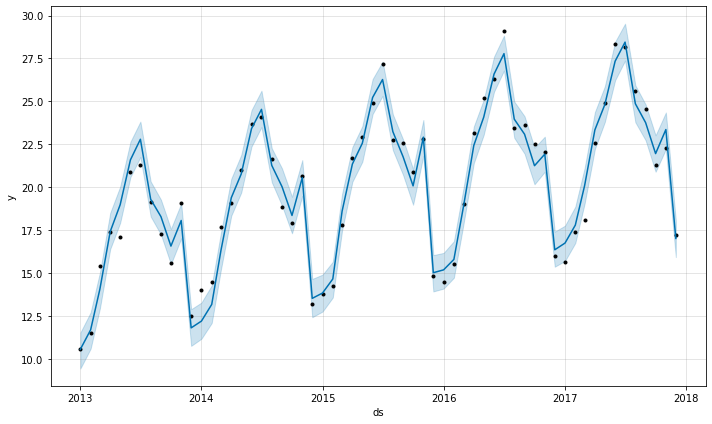

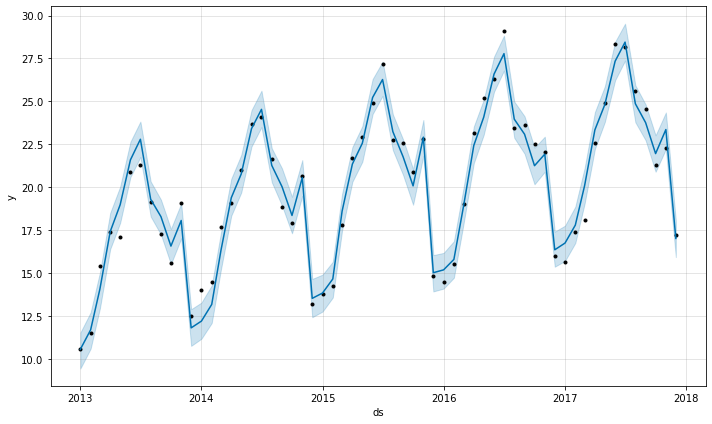

In [115]:
#Category 2
y_item2.reset_index(inplace=True)
#Fitting the model
y_item2.rename(columns={'date':'ds',"sales":'y'},inplace=True)
future_dates2 = model_fb.make_future_dataframe(periods=12,freq='MS')
prediction2 = model_fb.predict(y_item2)
model_fb.plot(prediction2)



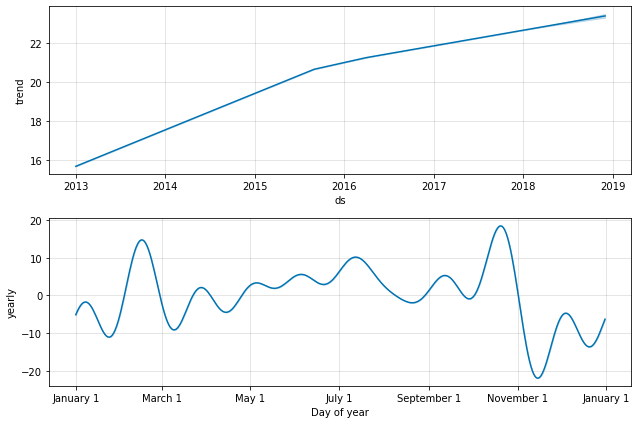

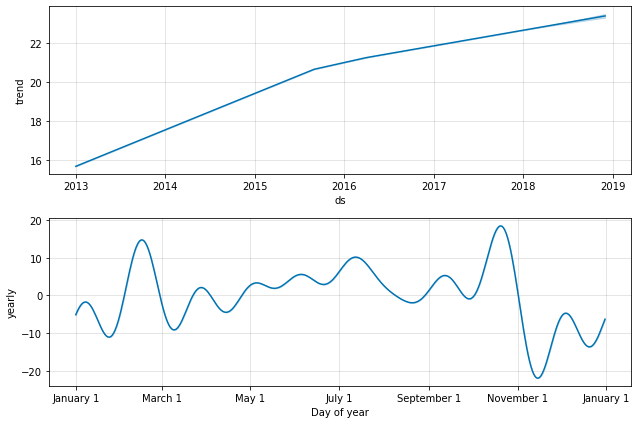

In [116]:
#Trend visualisation for item1
# Visualize Each Components[Trends,yearly]
model_fb.plot_components(prediction)

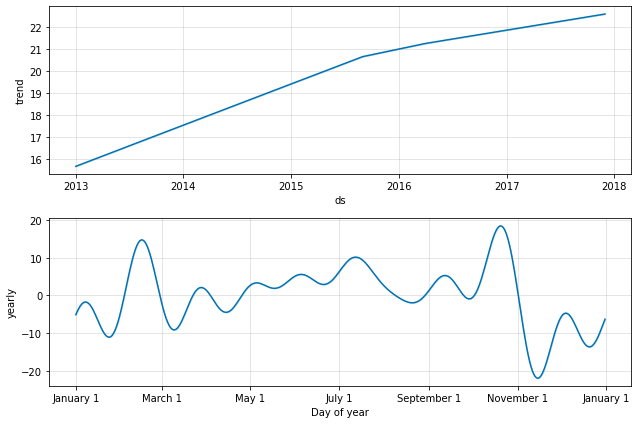

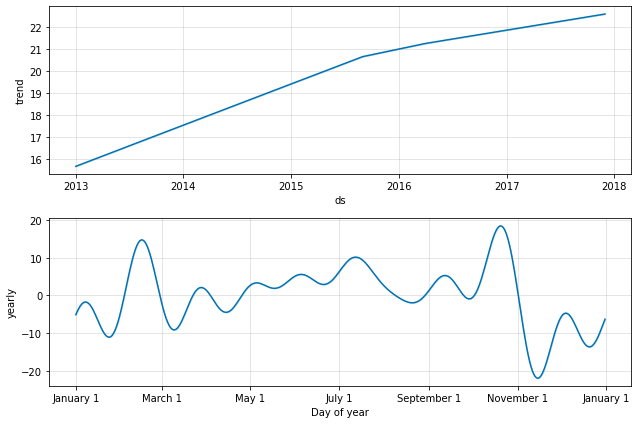

In [117]:
# Trend visualisation for item 2
model_fb.plot_components(prediction2)

From trend we can conclude that the sales will increase every year , but the there is a significant drop in purchase towards the year end which could be observed from the yearly trend plot

In [118]:
sarima = prediction[['ds','yhat']].iloc[len(y1)-1:].head(5)
sarima.set_index('ds',inplace=True)
sarima.columns=['y_prophet']
sarima

,y_prophet
ds,
2017-12-01,17.019764
2018-01-01,17.322767
2018-02-01,18.202284
2018-03-01,21.284521
2018-04-01,24.243366


In [119]:
fbprophet = pd.DataFrame(forecast)
fbprophet.rename(columns={'predicted_mean':'y_sarima'},inplace=True)
fbprophet

,y_sarima
2017-12-01,17.247118
2018-01-01,16.936283
2018-02-01,17.948552
2018-03-01,21.492629
2018-04-01,25.309807


Item1 sales predicted values from SARIMA and FBPROPHET method

In [120]:
predicted_df = pd.concat([sarima,fbprophet],join='inner',axis=1)
predicted_df

,y_prophet,y_sarima
2017-12-01,17.019764,17.247118
2018-01-01,17.322767,16.936283
2018-02-01,18.202284,17.948552
2018-03-01,21.284521,21.492629
2018-04-01,24.243366,25.309807


From the table it is clear the predictions from two methods are approximately similar in value.